<a href="https://colab.research.google.com/github/monarkparekh/MAE-598__Design-Optimization/blob/Assignment-2/MAE_598__Design_Optimization_HW2_Q2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>MAE 598 Design Optimization: 
Assignment 2, Question 2b</h1></b>

Name: Monark Parekh <br> 
ASU ID: 1222179426


Importing the required libraries

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import math

Defining the Function, Gradient and Hessian matrix

In [300]:
function = lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2

def gradient(x): 
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

Hessian = np.array([[10,12],[12,20]])

<b>Line Search Algorithm</b>

In [301]:
def linesearchalgorithm(x):
    alpha = 1
    t = 0.3
    beta = 0.5
    temp = -1 * gradient(x)
    # Defining the function to calculate phi(alpha)
    def pi(alpha, x):
      return function(x) - alpha * t * np.matmul(np.transpose(gradient(x)), temp)
    # Comparing phi(alpha) and f(x - alpha*gradient)
    while pi(alpha, x) < function(x + alpha*temp):
      alpha = beta * alpha
    # Returning the Final value of alpha
    return alpha

## <b>Gradient Descent Algorithm</b>

In [302]:
def gradientdescentalgorithm(function,gradient,Hessian,x0,maximum_iteration):
  epsilon = (10)**-6
  X = []
  gradient_normal = []
  X.append(x0)
  for k in range(0,maximum_iteration):
      gradient_normal.append(np.linalg.norm(gradient(X[k])))

      if gradient_normal[k] <= epsilon:
        x1 = 1-(2*X[k][0]+3*X[k][1])
        error_values = [abs(function(X[i])-function([-1/7,11/14])) for i in range(len(X))]
        X = np.insert(X,0,x1,axis=1)
        print(f'\nThe Gradient Descent Algorithm has converged to a point in {k} iterations\n')
        print(f'Current Gradient Normal is {gradient_normal[k]}\n[x1,x2,x3] = {X[k]}')
        return X,gradient_normal,(k),error_values
      
      alpha = linesearchalgorithm(X[k])
      new_X = X[k] - alpha*gradient(X[k])
      X.append(new_X)

      if k == (maximum_iteration - 1):
        print(f"Number of iterations has exceeded the maxinimum iterations, still not converged to the given threshold.\nCurrent Gradient Normal is {gradient_normal[k]}\nCurrent point is {X[k]}")
        return X,gradient_normal,(k)

 

  

In [303]:
X_val,gradient_normal_val,(k),error_values_all  =  gradientdescentalgorithm(function,gradient,Hessian,np.array([0,0]),1000)


The Gradient Descent Algorithm has converged to a point in 100 iterations

Current Gradient Normal is 9.516108713790478e-07
[x1,x2,x3] = [-1.07142846 -0.142857    0.78571416]


Log Linear Convergence Plot for Gradient Descent Algorithm

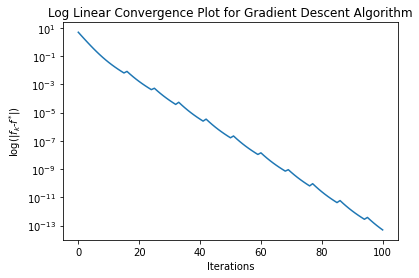

In [304]:
plt.yscale("log")
plt.plot(error_values_all)
plt.title('Log Linear Convergence Plot for Gradient Descent Algorithm')
plt.xlabel('Iterations')
plt.ylabel('log(|$f_k$-$f^{*}$|)')
plt.show()

Change in x2 and x3 for Gradient Descent Algorithm

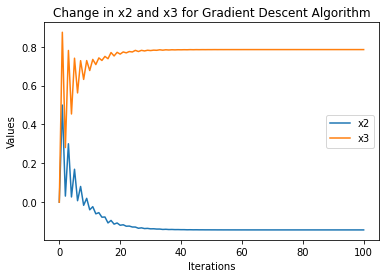

In [305]:
X2_values = []
q = [X2_values.append(i[1]) for i in X_val]
X3_values = []
q = [X3_values.append(i[2]) for i in X_val]
plt.plot(range(0,k+1),X2_values)
plt.plot(range(0,k+1),X3_values)
plt.title('Change in x2 and x3 for Gradient Descent Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.legend(["x2","x3"])
plt.show()

# <b>Newton's Algorithm</b>

In [306]:
def newtonsalgorithm(function,gradient,Hessian,x0,maximum_iteration):
  epsilon = (10)**-6
  X = []
  gradient_normal = []
  X.append(x0)
  for k in range(0,maximum_iteration):
      gradient_normal.append(np.linalg.norm(gradient(X[k])))

      if gradient_normal[k] <= epsilon:
        x1 = 1-(2*X[k][0]+3*X[k][1])
        error_values = [abs(function(X[i])-function([-1/7,11/14])) for i in range(len(X))]
        X = np.insert(X,0,x1,axis=1)
        print(f'\nThe Newtons Algorithm has converged to a point in {k} iterations\n')
        print(f'Current Gradient Normal is {gradient_normal[k]}\n[x1,x2,x3] = {X[k]}')
        return X,gradient_normal,(k),error_values
      
      new_X = X[k] - np.matmul(np.linalg.inv(Hessian), gradient(X[k]))
      X.append(new_X)

      if k == (maximum_iteration - 1):
        print(f"Number of iterations has exceeded the maxinimum iterations, still not converged to the given threshold.\nCurrent Gradient Normal is {gradient_normal[k]}\nCurrent point is {X[k]}")
        return X,gradient_normal,(k)

 

  

In [307]:
X_val,gradient_normal_val,(k),error_values_all  =  newtonsalgorithm(function,gradient,Hessian,np.array([0,0]),1000)


The Newtons Algorithm has converged to a point in 1 iterations

Current Gradient Normal is 3.972054645195637e-15
[x1,x2,x3] = [-1.07142857 -0.14285714  0.78571429]


Log Linear Convergence Plot for Newtons Algorithm

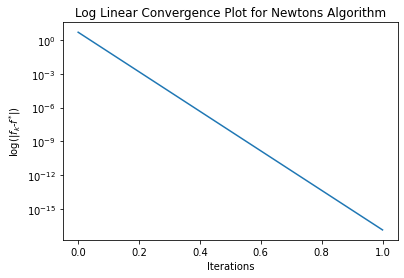

In [308]:
plt.yscale("log")
plt.plot(error_values_all)
plt.title('Log Linear Convergence Plot for Newtons Algorithm')
plt.xlabel('Iterations')
plt.ylabel('log(|$f_k$-$f^{*}$|)')
plt.show()

Change in x2 and x3 for Newtons Algorithm

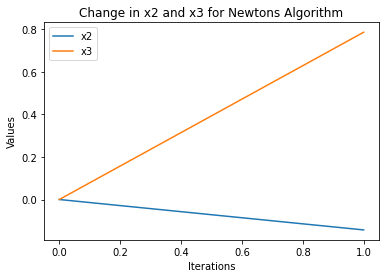

In [309]:
X2_values = []
q = [X2_values.append(i[1]) for i in X_val]
X3_values = []
q = [X3_values.append(i[2]) for i in X_val]
plt.plot(range(0,k+1),X2_values)
plt.plot(range(0,k+1),X3_values)
plt.title('Change in x2 and x3 for Newtons Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.legend(["x2","x3"])
plt.show()

# <b> SUMMARY FOR GRADIENT DESCENT ALGORITHM </b>#
Different initial points are tested and their corresponding results are shown: 

In [ ]:
all_initial_values = []
all_final_values = []
all_numberofiterations = []
for i in range(0,100):
  x0 = 4*np.random.rand(2)-2
  all_initial_values.append(x0)
  X_val,gradient_normal_val,(k),error_values_all  =  gradientdescentalgorithm(function,gradient,Hessian,x0,1000)
  all_final_values.append(X_val[k])
  all_numberofiterations.append(k) 


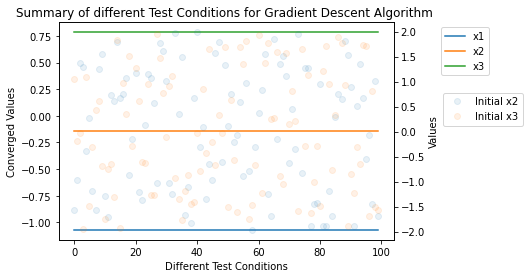

In [311]:
all_X1_final_values = []
q = [all_X1_final_values.append(i[0]) for i in all_final_values]
all_X2_final_values = []
q = [all_X2_final_values.append(i[1]) for i in all_final_values]
all_X3_final_values = []
q = [all_X3_final_values.append(i[2]) for i in all_final_values]

all_X2_initial_values = []
q = [all_X2_initial_values.append(i[0]) for i in all_initial_values]
all_X3_initial_values = []
q = [all_X3_initial_values.append(i[1]) for i in all_initial_values]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(0,100),all_X1_final_values)
ax1.plot(range(0,100),all_X2_final_values)
ax1.plot(range(0,100),all_X3_final_values)
ax2.plot(range(0,100),all_X2_initial_values,'o',alpha=0.1)
ax2.plot(range(0,100),all_X3_initial_values,'o',alpha=0.1)
plt.title('Summary of different Test Conditions for Gradient Descent Algorithm ')
ax1.set_xlabel('Different Test Conditions')
ax1.set_ylabel('Converged Values')
ax2.set_ylabel('Values')
ax1.legend(["x1","x2","x3"], bbox_to_anchor = (1.3, 1))
ax2.legend(['Initial x2', 'Initial x3'], bbox_to_anchor = (1.4, 0.7))
plt.show()

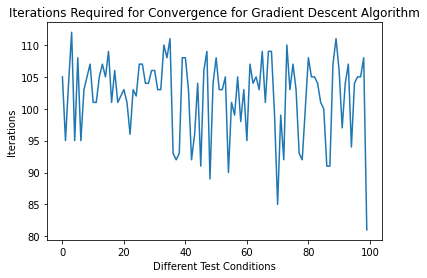

In [312]:
plt.plot(range(0,100), all_numberofiterations)
plt.title('Iterations Required for Convergence for Gradient Descent Algorithm')
plt.xlabel('Different Test Conditions')
plt.ylabel('Iterations')
plt.show()

Determining the the overall impact of initial guess for Gradient Descent Method

In [321]:
standard_deviation_x1 = 0
standard_deviation_x2 = 0
standard_deviation_x3 = 0
mean_x1 = sum(all_X1_final_values)/len(all_X1_final_values)
mean_x2 = sum(all_X2_final_values)/len(all_X2_final_values)
mean_x3 = sum(all_X3_final_values)/len(all_X3_final_values)
for i in all_X1_final_values: 
  standard_deviation_x1 = standard_deviation_x1 + ( i - mean_x1)**2 
  standard_deviation_x1 = (standard_deviation_x1/len(all_X1_final_values))**(1/2)

for i in all_X2_final_values: 
  standard_deviation_x2 = standard_deviation_x2 + ( i - mean_x2)**2 
  standard_deviation_x2 = (standard_deviation_x2/len(all_X2_final_values))**(1/2)

for i in all_X3_final_values: 
  standard_deviation_x3 = standard_deviation_x3 + ( i - mean_x3)**2 
  standard_deviation_x3 = (standard_deviation_x3/len(all_X3_final_values))**(1/2)

print(f"The Mean of x1 is {mean_x1}, whereas the Standard Deviation is {standard_deviation_x1}")
print(f"The Mean of x2 is {mean_x2}, whereas the Standard Deviation is {standard_deviation_x2}")
print(f"The Mean of x3 is {mean_x3}, whereas the Standard Deviation is {standard_deviation_x3}")

The Mean of x1 is -1.0714285852862813, whereas the Standard Deviation is 0.010000000000007813
The Mean of x2 is -0.14285709634050625, whereas the Standard Deviation is 0.01000000000001888
The Mean of x3 is 0.7857142593224314, whereas the Standard Deviation is 0.010000000000008913


# <b> SUMMARY FOR NEWTON'S ALGORITHM </b>#
Different initial points are tested and their corresponding results are shown: 

In [ ]:
all_initial_values = []
all_final_values = []
all_numberofiterations = []
for i in range(0,100):
  x0 = 4*np.random.rand(2)-2
  all_initial_values.append(x0)
  X_val,gradient_normal_val,(k),error_values_all  =  newtonsalgorithm(function,gradient,Hessian,x0,1000)
  all_final_values.append(X_val[k])
  all_numberofiterations.append(k) 


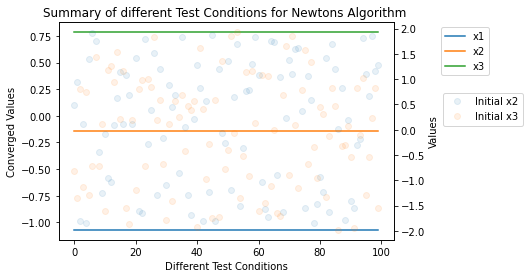

In [323]:
all_X1_final_values = []
q = [all_X1_final_values.append(i[0]) for i in all_final_values]
all_X2_final_values = []
q = [all_X2_final_values.append(i[1]) for i in all_final_values]
all_X3_final_values = []
q = [all_X3_final_values.append(i[2]) for i in all_final_values]

all_X2_initial_values = []
q = [all_X2_initial_values.append(i[0]) for i in all_initial_values]
all_X3_initial_values = []
q = [all_X3_initial_values.append(i[1]) for i in all_initial_values]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(0,100),all_X1_final_values)
ax1.plot(range(0,100),all_X2_final_values)
ax1.plot(range(0,100),all_X3_final_values)
ax2.plot(range(0,100),all_X2_initial_values,'o',alpha=0.1)
ax2.plot(range(0,100),all_X3_initial_values,'o',alpha=0.1)
plt.title('Summary of different Test Conditions for Newtons Algorithm ')
ax1.set_xlabel('Different Test Conditions')
ax1.set_ylabel('Converged Values')
ax2.set_ylabel('Values')
ax1.legend(["x1","x2","x3"], bbox_to_anchor = (1.3, 1))
ax2.legend(['Initial x2', 'Initial x3'], bbox_to_anchor = (1.4, 0.7))
plt.show()

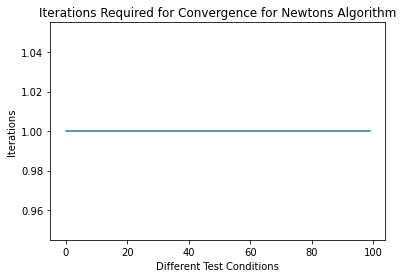

In [324]:
plt.plot(range(0,100), all_numberofiterations)
plt.title('Iterations Required for Convergence for Newtons Algorithm')
plt.xlabel('Different Test Conditions')
plt.ylabel('Iterations')
plt.show()

Determining the the overall impact of initial guess for Newton's Method

In [325]:
standard_deviation_x1 = 0
standard_deviation_x2 = 0
standard_deviation_x3 = 0
mean_x1 = sum(all_X1_final_values)/len(all_X1_final_values)
mean_x2 = sum(all_X2_final_values)/len(all_X2_final_values)
mean_x3 = sum(all_X3_final_values)/len(all_X3_final_values)
for i in all_X1_final_values: 
  standard_deviation_x1 = standard_deviation_x1 + ( i - mean_x1)**2 
  standard_deviation_x1 = (standard_deviation_x1/len(all_X1_final_values))**(1/2)

for i in all_X2_final_values: 
  standard_deviation_x2 = standard_deviation_x2 + ( i - mean_x2)**2 
  standard_deviation_x2 = (standard_deviation_x2/len(all_X2_final_values))**(1/2)

for i in all_X3_final_values: 
  standard_deviation_x3 = standard_deviation_x3 + ( i - mean_x3)**2 
  standard_deviation_x3 = (standard_deviation_x3/len(all_X3_final_values))**(1/2)

print(f"The Mean of x1 is {mean_x1}, whereas the Standard Deviation is {standard_deviation_x1}")
print(f"The Mean of x2 is {mean_x2}, whereas the Standard Deviation is {standard_deviation_x2}")
print(f"The Mean of x3 is {mean_x3}, whereas the Standard Deviation is {standard_deviation_x3}")

The Mean of x1 is -1.0714285714285705, whereas the Standard Deviation is 0.01
The Mean of x2 is -0.14285714285714285, whereas the Standard Deviation is 0.01
The Mean of x3 is 0.7857142857142863, whereas the Standard Deviation is 0.01


<h2> I used 100 random initial points to determine the results for both the Gradient Descent Algorithm and Newton's Algorithm. Both the algorithms give the convergence point of: </h2>
<h2>
[x1, x2, x3] = [-1.07142857, -0.14285714, 0.78571429]</h2>
<h2>
Also, the standard deviation for 100 different results obtained for 100 different initial conditions is very small (~0.01). 
</h2>
<h2>
However, the number iterations required for convergence for Gradient Descent Algorithm varies with the initial point, on the other hand the Newton's Algorithm always converges in 1 iteration, regardless of the inital point.
 </h2>